In [28]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline
import datetime

In [29]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

#### Cryptocurrency Analysis
#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [30]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [31]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18787512,
            "id": 1,
            "last_updated": 1629084904,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 895830670446,
                    "percent_change_1h": 0.115477423111319,
                    "percent_change_24h": 0.739797179953479,
                    "percent_change_7d": 8.90533873836633,
                    "percentage_change_1h": 0.115477423111319,
                    "percentage_change_24h": 0.739797179953479,
                    "percentage_change_7d": 8.90533873836633,
                    "price": 47650.0,
                    "volume_24h": 35088969417
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18787512,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [32]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 117123623,
            "id": 1027,
            "last_updated": 1629084888,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 386068587420,
                    "percent_change_1h": -0.298708654196853,
                    "percent_change_24h": 0.319740475060852,
                    "percent_change_7d": 9.32641673336361,
                    "percentage_change_1h": -0.298708654196853,
                    "percentage_change_24h": 0.319740475060852,
                    "percentage_change_7d": 9.32641673336361,
                    "price": 3293.25,
                    "volume_24h": 25400650045
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 117123623,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [33]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for Bitcoin is ${btc_price:,.2f}")


The price for Bitcoin is $47,650.00


In [34]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for Ethereum is ${eth_price:,.2f}")


The price for Ethereum is $3,293.25


#### Calculate the amount of coins the retiree can afford to purchase.  
#### Take amount able to invest divide by 2, equals "half the amount".
#### Take "half the amount" divide by BTC price equals the amount of BTC to purchase.
#### Take "half the amount" divide by ETH price equals the amount of ETH to purchase.

In [35]:
# amount that retiree can invest.  Answer and press enter. 
savings_amount= int(input("Enter savings account information:"))

half_savings = savings_amount / 2
btc_coins = half_savings / btc_price
eth_coins = half_savings / eth_price

Enter savings account information:4000


In [36]:
# Print current holding in BTC
print(f"You now are holding {btc_coins} Bitcoin")

You now are holding 0.04197271773347324 Bitcoin


In [37]:
# Print current holding in ETH
print(f"The now are holding {eth_coins} Ethereum")

The now are holding 0.6073028163668109 Ethereum


In [38]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
btc_df = pd.read_csv(
    Path('./Resources/Bitcoin Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [39]:
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].str.replace(",","")
btc_df.loc[:,"Price"]=btc_df.loc[:,"Price"].astype("float")

btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].str.replace(",","")
btc_df.loc[:,"Open"]=btc_df.loc[:,"Open"].astype("float")

btc_df.loc[:,"High"]=btc_df.loc[:,"High"].str.replace(",","")
btc_df.loc[:,"High"]=btc_df.loc[:,"High"].astype("float")

btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].str.replace(",","")
btc_df.loc[:,"Low"]=btc_df.loc[:,"Low"].astype("float")

btc_df = btc_df.drop(columns=["Change %"])

In [40]:
# This function converts the string values into a floating point number
def clean_currency(price_string):
    price = price_string
    if type(price_string) == str:
        price_string = price_string.replace('$', '')
        price_string = price_string.replace('-', '0')
        if price_string[-1] == 'K':
            thousand = 1000
            price_string = price_string.replace('K', '')
            price = float(price_string)
            price = price * thousand
        elif price_string[-1] == 'M':
            million = 1000000
            price_string = price_string.replace('M', '')
            price = float(price_string)
            price = price * million
        else:
            billion = 1000000000
            price_string = price_string.replace('B', '')
            price = float(price_string)
            price = price * billion
    return price

In [41]:
btc_df['Vol.'] = btc_df['Vol.'].apply(clean_currency)

In [42]:
list(btc_df.columns)

['Price', 'Open', 'High', 'Low', 'Vol.']

In [43]:
btc_df2 = btc_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
btc_df2.columns = columns
btc_df2.keys()


Index(['open', 'high', ' low', 'close', 'volume'], dtype='object')

In [44]:
# Read in the CSV file called "Bitcoin Historical Data.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
eth_df = pd.read_csv(
    Path('./Resources/Ethereum Historical Data.csv'), 
    index_col="Date", parse_dates=True, infer_datetime_format=True)

In [45]:
eth_df = eth_df.drop(columns=["Change %"])

eth_df['Vol.'] = eth_df['Vol.'].apply(clean_currency)

eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].str.replace(",","")
eth_df.loc[:,"Price"]=eth_df.loc[:,"Price"].astype("float")

eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].str.replace(",","")
eth_df.loc[:,"Open"]=eth_df.loc[:,"Open"].astype("float")

eth_df.loc[:,"High"]=eth_df.loc[:,"High"].str.replace(",","")
eth_df.loc[:,"High"]=eth_df.loc[:,"High"].astype("float")

eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].str.replace(",","")
eth_df.loc[:,"Low"]=eth_df.loc[:,"Low"].astype("float")


In [46]:
eth_df2 = eth_df[['Open', 'High', 'Low', 'Price', 'Vol.']]
columns = ["open", "high"," low", "close", "volume"]
eth_df2.columns = columns
eth_df2.head()

,open,high,low,close,volume
Date,,,,,
2021-08-14,3322.25,3328.38,3209.45,3256.84,167280.0
2021-08-13,3043.20,3324.53,3035.52,3322.43,795540.0
2021-08-12,3160.17,3236.28,2981.35,3043.61,965630.0
2021-08-11,3140.86,3269.70,3122.67,3163.66,950120.0
2021-08-10,3162.81,3232.02,3057.84,3140.71,1120000.0


In [47]:
# Create a dictionary of the two dataframes
to_merge_dict = {'BTC': btc_df2 , 'ETH': eth_df2}

In [48]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

In [49]:
merged_df.head()

BTC                                          ETH           \
               open     high      low    close   volume     open     high   
Date                                                                        
2021-08-14  47809.6  48090.9  46117.2  46947.6  65270.0  3322.25  3328.38   
2021-08-13  44404.0  47836.0  44242.4  47809.1  75270.0  3043.20  3324.53   
2021-08-12  45562.3  46213.8  43814.7  44403.4  81070.0  3160.17  3236.28   
2021-08-11  45593.2  46736.5  45367.9  45564.3  75430.0  3140.86  3269.70   
2021-08-10  46281.8  46663.4  44681.2  45593.8  80550.0  3162.81  3232.02   

                                         
                low    close     volume  
Date                                     
2021-08-14  3209.45  3256.84   167280.0  
2021-08-13  3035.52  3322.43   795540.0  
2021-08-12  2981.35  3043.61   965630.0  
2021-08-11  3122.67  3163.66   950120.0  
2021-08-10  3057.84  3140.71  1120000.0

In [50]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns
# Run 500 samples.
MC_crypto = MCSimulation(
  portfolio_data = merged_df,
  weights = [.5, .5],
  num_simulation = 500,
  num_trading_days = 252*5
)

# Review the simulation input data
MC_crypto.portfolio_data.head()


BTC                                                       ETH  \
               open     high      low    close   volume daily_return     open   
Date                                                                            
2021-08-14  47809.6  48090.9  46117.2  46947.6  65270.0          NaN  3322.25   
2021-08-13  44404.0  47836.0  44242.4  47809.1  75270.0     0.018350  3043.20   
2021-08-12  45562.3  46213.8  43814.7  44403.4  81070.0    -0.071235  3160.17   
2021-08-11  45593.2  46736.5  45367.9  45564.3  75430.0     0.026144  3140.86   
2021-08-10  46281.8  46663.4  44681.2  45593.8  80550.0     0.000647  3162.81   

                                                               
               high      low    close     volume daily_return  
Date                                                           
2021-08-14  3328.38  3209.45  3256.84   167280.0          NaN  
2021-08-13  3324.53  3035.52  3322.43   795540.0     0.020139  
2021-08-12  3236.28  2981.35  3043.61   965630.0    -0.083921  
2021-08-11  3269.70  3122.67  3163.66   950120.0     0.039443  
2021-08-10  3232.02  3057.84  3140.71  1120000.0    -0.007254

In [51]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns
MC_crypto.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.954691,1.016108,1.006292,0.960916,0.995720,1.017967,1.040747,0.998690,0.956650,1.015088,...,0.934562,1.059191,0.972356,0.983769,1.046537,1.077713,1.025954,0.970897,1.002220,1.045059
2,0.988122,1.040033,0.993538,0.906590,1.067986,0.996214,1.050820,0.965556,0.914204,1.073463,...,0.949164,1.104289,0.900401,1.011860,1.066960,1.097058,1.026959,0.922580,1.034513,1.016817
3,0.987971,1.037506,1.017412,0.938726,1.097518,0.991838,1.124474,1.016686,0.925521,1.029731,...,0.998023,1.127495,0.891184,1.016736,1.105275,1.117003,1.011142,0.901057,1.049730,1.038156
4,1.025140,1.030531,1.003890,0.982619,1.133364,0.972267,1.147113,1.028813,0.867919,1.038541,...,1.014493,1.168766,0.911651,0.972527,1.126696,1.066727,1.010588,0.886193,1.015477,1.083421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.028719,0.018915,0.042275,0.134920,0.045278,0.143384,0.035494,0.084961,0.427993,0.072332,...,0.279376,0.087680,0.214819,0.337024,0.065401,0.405200,0.027992,0.080313,0.089156,0.030614
1257,0.029439,0.019570,0.041158,0.145351,0.045595,0.146217,0.036282,0.085055,0.420355,0.072599,...,0.258727,0.087705,0.218611,0.323188,0.067967,0.411044,0.029104,0.082015,0.089678,0.029701
1258,0.028811,0.020449,0.041693,0.150048,0.043076,0.142557,0.037132,0.084535,0.389713,0.074033,...,0.253138,0.088745,0.216595,0.337716,0.069781,0.424632,0.029065,0.078955,0.089069,0.029931
1259,0.028272,0.021421,0.040366,0.149927,0.045331,0.142258,0.038872,0.086264,0.392915,0.071875,...,0.267033,0.089573,0.219273,0.318606,0.068463,0.435545,0.028025,0.078691,0.085573,0.030349


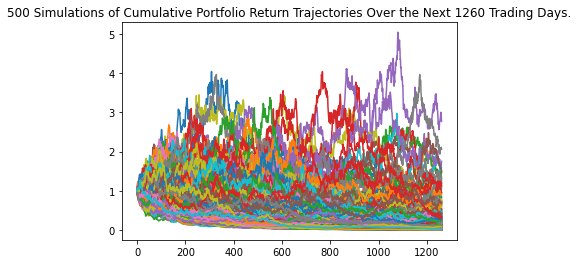

In [52]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_crypto.plot_simulation()

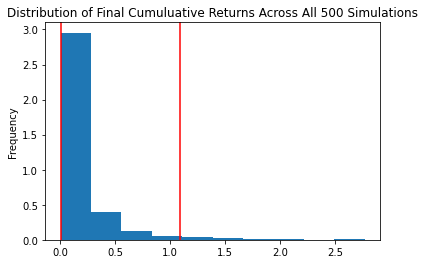

In [53]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_crypto.plot_distribution()


In [54]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_crypto.summarize_cumulative_return()


# Review the 5-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              0.190636
std               0.289983
min               0.002665
25%               0.040363
50%               0.094489
75%               0.207041
max               2.771670
95% CI Lower      0.006775
95% CI Upper      1.089266
Name: 1260, dtype: float64


In [55]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current investment into cryptocurrency is ${savings_amount:,.2f}")

The current investment into cryptocurrency is $4,000.00


In [56]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that your investment over the next 5 years will end within in the range of ${ci_lower_cumulative_return:,.2f} and ${ci_upper_cumulative_return:,.2f}.")

There is a 95% chance that your investment over the next 5 years will end within in the range of $27.10 and $4,357.06.


## Coding for FAANG portion begins here

#### Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [57]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


## Getting the close prices on current date

In [58]:
# Set the tickers for the stock portion of the portfolio
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

# Set timeframe to 1D 
timeframe = "1D"

# Set today's date and date 3 years back for later when running MC
today_date = str(datetime.datetime.now()).split()[0]
three_year_ago = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]
today_date, three_year_ago

# Format current date as ISO format
start_date = pd.Timestamp("2018-08-13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-08-13", tz="America/New_York").isoformat()

#start_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()
#end_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()

In [59]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


AAPL                                      AMZN  \
                            open     high    low   close    volume    open   
time                                                                         
2018-08-13 00:00:00-04:00  207.7  210.952  207.7  208.86  21242149  1898.5   

                                                            ...     GOOG  \
                           high      low    close   volume  ...     open   
time                                                        ...            
2018-08-13 00:00:00-04:00  1925  1893.67  1895.65  4399293  ...  1236.98   

                                                                NFLX          \
                              high      low    close  volume    open    high   
time                                                                           
2018-08-13 00:00:00-04:00  1249.27  1233.64  1235.25  497054  339.96  347.19   

                                                    
                              low   close   volume  
time                                                
2018-08-13 00:00:00-04:00  339.08  341.32  4919717  

[1 rows x 25 columns]

In [60]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
fb_close_price = df_portfolio["FB"]["close"]
fb_close_price = float(fb_close_price)
# Print the FB closing price
print(f"The closing price of Facebook is ${fb_close_price:,.2f}")

The closing price of Facebook is $180.10


In [61]:
# Access the closing price for AMZN from the Alpaca DataFrame
# Converting the value to a floating point number
amzn_close_price = df_portfolio["AMZN"]["close"]
amzn_close_price = float(amzn_close_price)
# Print the AMZN closing price
print(f"The closing price of Amazon is ${amzn_close_price:,.2f}")

The closing price of Amazon is $1,895.65


In [62]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
aapl_close_price = df_portfolio["AAPL"]["close"]
aapl_close_price = float(aapl_close_price)
# Print the AAPL closing price
print(f"The closing price of Apple is ${aapl_close_price:,.2f}")

The closing price of Apple is $208.86


In [63]:
# Access the closing price for FB from the Alpaca DataFrame
# Converting the value to a floating point number
nflx_close_price = df_portfolio["NFLX"]["close"]
nflx_close_price = float(nflx_close_price)
# Print the NFLX closing price
print(f"The closing price of Netflix is ${nflx_close_price:,.2f}")

The closing price of Netflix is $341.32


In [64]:
# Access the closing price for GOOG from the Alpaca DataFrame
# Converting the value to a floating point number
goog_close_price = df_portfolio["GOOG"]["close"]
goog_close_price = float(goog_close_price)
# Print the GOOG closing price
print(f"The closing price of Google is ${goog_close_price:,.2f}")

The closing price of Google is $1,235.25


## Creating a Financial Planner for Retirement using Monte Carlo Simulations

In this section, we’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio.

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for an even 5-way split between FAANG stocks.

2. Run a Monte Carlo simulation of 500 samples and (ANSWER FROM QUESTIONAIRE) for the FAANG portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics.

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics.

4. Generate the summary statistics for the Monte Carlo simulation.



#### Make an API call via the Alpaca SDK to get 3 years of historical closing prices for FAANG

In [65]:
# Set start and end dates of 3 years back from your current date and work 3 years back from that date 
start_date = pd.Timestamp("2018-08-13", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-13", tz="America/New_York").isoformat()

#start_date = pd.Timestamp(today_date, tz="America/New_York").isoformat()
#end_date = pd.Timestamp(three_year_ago, tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [66]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Added the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

prices_df

AAPL                                       \
                              open      high     low    close    volume   
time                                                                      
2018-08-13 00:00:00-04:00  207.700  210.9520  207.70  208.860  21242149   
2018-08-14 00:00:00-04:00  210.155  210.5600  208.26  209.760  14731443   
2018-08-15 00:00:00-04:00  209.220  210.7400  208.33  210.300  22393387   
2018-08-16 00:00:00-04:00  211.750  213.8121  211.47  213.480  21207805   
2018-08-17 00:00:00-04:00  213.440  217.9500  213.16  217.610  28900675   
...                            ...       ...     ...      ...       ...   
2021-08-09 00:00:00-04:00  146.230  146.7000  145.52  146.090  39789209   
2021-08-10 00:00:00-04:00  146.460  147.7100  145.30  145.610  58788673   
2021-08-11 00:00:00-04:00  146.070  146.7200  145.53  145.910  44305648   
2021-08-12 00:00:00-04:00  146.200  149.0500  145.84  148.885  65367573   
2021-08-13 00:00:00-04:00  148.970  149.4444  148.27  149.100  54723818   

                              AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2018-08-13 00:00:00-04:00  1898.50  1925.0000  1893.6700  1895.65  4399293   
2018-08-14 00:00:00-04:00  1919.39  1921.0100  1900.0000  1919.86  3654984   
2018-08-15 00:00:00-04:00  1909.55  1916.2100  1869.7900  1882.37  7188924   
2018-08-16 00:00:00-04:00  1903.94  1905.0499  1883.5525  1887.47  3621475   
2018-08-17 00:00:00-04:00  1885.80  1888.0000  1855.5500  1882.22  3201138   
...                            ...        ...        ...      ...      ...   
2021-08-09 00:00:00-04:00  3342.99  3354.8800  3328.5200  3341.33  1855088   
2021-08-10 00:00:00-04:00  3346.03  3358.0000  3315.0000  3321.32  2216562   
2021-08-11 00:00:00-04:00  3331.01  3337.7000  3277.7900  3292.22  2751447   
2021-08-12 00:00:00-04:00  3292.68  3314.5100  3269.6700  3302.70  2060437   
2021-08-13 00:00:00-04:00  3306.02  3306.0650  3283.0000  3293.96  1935404   

                           ...     GOOG                                       \
                           ...     open      high       low    close  volume   
time                       ...                                                 
2018-08-13 00:00:00-04:00  ...  1236.98  1249.270  1233.640  1235.25  497054   
2018-08-14 00:00:00-04:00  ...  1236.86  1245.870  1225.110  1241.63  666393   
2018-08-15 00:00:00-04:00  ...  1229.26  1235.240  1209.510  1214.44  934552   
2018-08-16 00:00:00-04:00  ...  1224.73  1226.000  1202.550  1206.49  688463   
2018-08-17 00:00:00-04:00  ...  1203.35  1209.020  1188.240  1200.50  721586   
...                        ...      ...       ...       ...      ...     ...   
2021-08-09 00:00:00-04:00  ...  2738.98  2766.430  2728.575  2758.87  517942   
2021-08-10 00:00:00-04:00  ...  2763.27  2771.030  2744.530  2763.32  684106   
2021-08-11 00:00:00-04:00  ...  2765.42  2776.955  2747.000  2752.99  641720   
2021-08-12 00:00:00-04:00  ...  2750.76  2768.360  2735.580  2767.78  515188   
2021-08-13 00:00:00-04:00  ...  2771.08  2773.480  2760.100  2769.18  530643   

                             NFLX                                       
                             open      high       low   close   volume  
time                                                                    
2018-08-13 00:00:00-04:00  339.96  347.1900  339.0800  341.32  4919717  
2018-08-14 00:00:00-04:00  342.09  342.4100  336.2500  337.48  4177175  
2018-08-15 00:00:00-04:00  334.03  335.4962  321.0000  326.44  8523569  
2018-08-16 00:00:00-04:00  329.90  331.1700  321.2138  322.44  4856904  
2018-08-17 00:00:00-04:00  319.01  324.3650  312.9600  316.78  7899426  
...                           ...       ...       ...     ...      ...  
2021-08-09 00:00:00-04:00  522.42  522.6699  517.9900  519.98  1191314  
2021-08-10 00:00:00-04:00  519.51  

#### Run a Monte Carlo simulation of 500 samples and 5 years.

In [67]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns
# Run 500 samples.
MC_faang = MCSimulation(
  portfolio_data = prices_df,
  weights = [.2, .2, .2, .2, .2],
  num_simulation = 500,
  num_trading_days = 252*5
)

# Review the simulation input data
MC_faang.portfolio_data.head()


AAPL                                      \
                              open      high     low   close    volume   
time                                                                     
2018-08-13 00:00:00-04:00  207.700  210.9520  207.70  208.86  21242149   
2018-08-14 00:00:00-04:00  210.155  210.5600  208.26  209.76  14731443   
2018-08-15 00:00:00-04:00  209.220  210.7400  208.33  210.30  22393387   
2018-08-16 00:00:00-04:00  211.750  213.8121  211.47  213.48  21207805   
2018-08-17 00:00:00-04:00  213.440  217.9500  213.16  217.61  28900675   

                                           AMZN                        \
                          daily_return     open       high        low   
time                                                                    
2018-08-13 00:00:00-04:00          NaN  1898.50  1925.0000  1893.6700   
2018-08-14 00:00:00-04:00     0.004309  1919.39  1921.0100  1900.0000   
2018-08-15 00:00:00-04:00     0.002574  1909.55  1916.2100  1869.7900   
2018-08-16 00:00:00-04:00     0.015121  1903.94  1905.0499  1883.5525   
2018-08-17 00:00:00-04:00     0.019346  1885.80  1888.0000  1855.5500   

                                    ...     GOOG                   \
                             close  ...      low    close  volume   
time                                ...                             
2018-08-13 00:00:00-04:00  1895.65  ...  1233.64  1235.25  497054   
2018-08-14 00:00:00-04:00  1919.86  ...  1225.11  1241.63  666393   
2018-08-15 00:00:00-04:00  1882.37  ...  1209.51  1214.44  934552   
2018-08-16 00:00:00-04:00  1887.47  ...  1202.55  1206.49  688463   
2018-08-17 00:00:00-04:00  1882.22  ...  1188.24  1200.50  721586   

                                          NFLX                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-08-13 00:00:00-04:00          NaN  339.96  347.1900  339.0800  341.32   
2018-08-14 00:00:00-04:00     0.005165  342.09  342.4100  336.2500  337.48   
2018-08-15 00:00:00-04:00    -0.021899  334.03  335.4962  321.0000  326.44   
2018-08-16 00:00:00-04:00    -0.006546  329.90  331.1700  321.2138  322.44   
2018-08-17 00:00:00-04:00    -0.004965  319.01  324.3650  312.9600  316.78   

                                                 
                            volume daily_return  
time                                             
2018-08-13 00:00:00-04:00  4919717          NaN  
2018-08-14 00:00:00-04:00  4177175    -0.011250  
2018-08-15 00:00:00-04:00  8523569    -0.032713  
2018-08-16 00:00:00-04:00  4856904    -0.012253  
2018-08-17 00:00:00-04:00  7899426    -0.017554  

[5 rows x 30 columns]

In [68]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns
MC_faang.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997260,1.007157,1.003323,0.994133,1.005156,0.985304,1.003437,1.012126,1.004927,0.994401,...,0.985552,0.990534,1.009967,0.995512,1.021385,0.997294,0.994364,0.997117,0.997445,0.999298
2,0.990412,1.012342,0.987032,0.994385,1.015952,0.983993,1.023157,0.995044,1.012710,0.998774,...,0.972543,1.003955,1.006812,0.982088,1.017150,0.987178,0.994244,1.015951,1.000571,1.031166
3,0.999892,1.005634,0.999584,1.019149,1.006484,1.002231,1.030171,0.983295,1.016590,1.010452,...,0.969168,0.996407,1.009232,0.958783,1.018034,0.974109,0.995968,1.008254,0.997943,1.021994
4,1.013644,1.002927,0.982059,1.018872,1.005731,1.019350,1.040220,0.993851,1.012542,1.032440,...,0.995558,1.001533,0.992356,0.952177,1.017258,0.983660,0.988053,1.011463,0.995043,1.013014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.415353,3.014898,2.125309,4.887230,2.660712,1.573683,1.368382,2.001833,2.716388,3.465197,...,3.346470,4.405060,1.503793,3.783252,3.652600,2.055072,2.860537,3.536680,2.758342,3.934035
1257,3.479435,3.080199,2.113038,4.911163,2.671985,1.550642,1.368236,1.979640,2.789743,3.541018,...,3.341240,4.362076,1.496184,3.739802,3.624015,2.030113,2.845724,3.602931,2.771992,4.025329
1258,3.474407,3.139601,2.127138,4.898998,2.628557,1.537337,1.337954,2.021035,2.790097,3.575059,...,3.340638,4.306903,1.502939,3.700805,3.570194,2.015163,2.800016,3.552737,2.798058,3.970710
1259,3.532564,3.177503,2.141004,4.821865,2.592099,1.513259,1.327439,2.001383,2.774083,3.599075,...,3.381384,4.277179,1.507174,3.715770,3.546500,1.969110,2.769549,3.524581,2.824485,3.980397


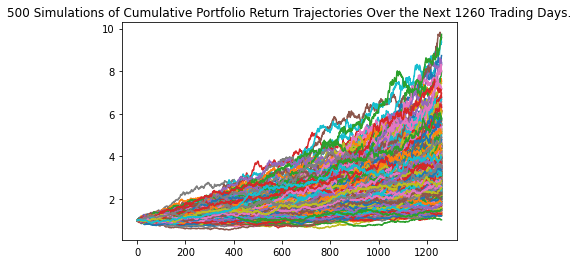

In [69]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_faang.plot_simulation()


#### Plot the probability distribution of the Monte Carlo simulation.

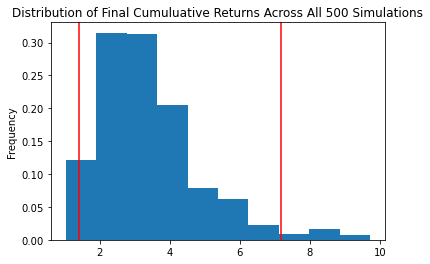

In [70]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_faang.plot_distribution()


#### Generate the summary statistics for the Monte Carlo simulation.

In [71]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_faang.summarize_cumulative_return()


# Review the 5-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              3.390833
std               1.467802
min               1.029051
25%               2.347104
50%               3.097462
75%               3.985666
max               9.725587
95% CI Lower      1.392970
95% CI Upper      7.174213
Name: 1260, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the summary statistics that we generated from the Monte Carlo simulation, the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval will be calculated below.


In [72]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of your investing in FAANG stocks is ${savings_amount:,.2f}")


The current balance of your investing in FAANG stocks is $4,000.00


In [73]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 5 years will end within in the range of ${ci_lower_cumulative_return:,.2f} and ${ci_upper_cumulative_return:,.2f}.")


There is a 95% chance that the portfolio over the next 5 years will end within in the range of $5,571.88 and $28,696.85.


## Coding for top 4 popular mutual funds
https://www.marketwatch.com/tools/mutual-fund/top25largest

In [74]:
tickers = ["SPY", "IVV", "VTI", "VOO"]

In [75]:
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

In [76]:
display(prices_df.head())
display(prices_df.tail())

IVV                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2018-08-13 00:00:00-04:00  285.47  286.1690  283.77  284.05  2880550  283.47   
2018-08-14 00:00:00-04:00  284.93  286.1639  284.50  285.88  2632011  282.92   
2018-08-15 00:00:00-04:00  284.37  284.4700  282.15  283.74  3152765  282.38   
2018-08-16 00:00:00-04:00  285.36  287.0700  285.36  286.10  2667679  283.40   
2018-08-17 00:00:00-04:00  285.87  287.5905  285.40  287.04  2459270  283.83   

                                                                    VOO  \
                               high       low   close    volume    open   
time                                                                      
2018-08-13 00:00:00-04:00  284.1600  281.7700  282.05  49247799  260.41   
2018-08-14 00:00:00-04:00  284.1700  282.4833  283.86  32906829  259.94   
2018-08-15 00:00:00-04:00  282.5400  280.1600  281.76  76384638  259.43   
2018-08-16 00:00:00-04:00  285.0400  283.3600  284.10  49048421  260.36   
2018-08-17 00:00:00-04:00  285.5601  283.3700  285.02  43630918  260.71   

                                                                VTI            \
                              high     low   close   volume    open      high   
time                                                                            
2018-08-13 00:00:00-04:00  261.070  258.90  259.13  2678975  146.40  146.7500   
2018-08-14 00:00:00-04:00  261.070  259.55  260.80  1295907  146.11  146.7837   
2018-08-15 00:00:00-04:00  259.550  257.39  258.87  2272963  145.87  146.0300   
2018-08-16 00:00:00-04:00  261.889  260.35  261.02  1456521  146.28  147.1500   
2018-08-17 00:00:00-04:00  262.380  260.35  261.86  1934489  146.45  147.3902   

                                                      
                                low   close   volume  
time                                                  
2018-08-13 00:00:00-04:00  145.4638  145.64  1702311  
2018-08-14 00:00:00-04:00  145.9200  146.64  1316438  
2018-08-15 00:00:00-04:00  144.6366  145.44  2351246  
2018-08-16 00:00:00-04:00  146.2600  146.64  1177718  
2018-08-17 00:00:00-04:00  146.3000  147.15  1949631

IVV                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-08-09 00:00:00-04:00  444.37  444.72  443.24  444.16  1592537  442.45   
2021-08-10 00:00:00-04:00  444.55  445.39  443.82  444.60  2413378  442.61   
2021-08-11 00:00:00-04:00  445.78  445.84  444.57  445.68  3090978  443.80   
2021-08-12 00:00:00-04:00  445.60  447.21  444.63  446.99  3816906  443.62   
2021-08-13 00:00:00-04:00  447.53  447.88  447.04  447.88  2098679  445.59   

                                                                  VOO  \
                               high     low   close    volume    open   
time                                                                    
2021-08-09 00:00:00-04:00  442.7950  441.31  442.14  32740524  406.75   
2021-08-10 00:00:00-04:00  443.4400  441.88  442.66  39129442  406.91   
2021-08-11 00:00:00-04:00  443.8820  442.62  443.74  35841235  408.00   
2021-08-12 00:00:00-04:00  445.2572  442.66  445.08  34892086  407.82   
2021-08-13 00:00:00-04:00  445.9300  445.07  445.90  32338962  409.64   

                                                                 VTI  \
                               high     low   close   volume    open   
time                                                                   
2021-08-09 00:00:00-04:00  407.0492  405.69  406.51  1890348  228.86   
2021-08-10 00:00:00-04:00  407.6700  406.23  406.92  2286440  229.00   
2021-08-11 00:00:00-04:00  408.0700  406.91  407.96  2612952  229.44   
2021-08-12 00:00:00-04:00  409.3300  406.97  409.13  2243163  229.35   
2021-08-13 00:00:00-04:00  409.9600  409.18  409.94  2045891  230.23   

                                                              
                               high     low   close   volume  
time                                                          
2021-08-09 00:00:00-04:00  229.0400  228.02  228.66  3007855  
2021-08-10 00:00:00-04:00  229.3099  228.51  228.74  2545896  
2021-08-11 00:00:00-04:00  229.4900  228.41  229.30  2970620  
2021-08-12 00:00:00-04:00  230.0200  228.77  229.92  2609786  
2021-08-13 00:00:00-04:00  230.2500  229.76  230.11  2403910

In [77]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns
# Run 500 samples.
MC_mutual_funds = MCSimulation(
  portfolio_data = prices_df,
  weights = [.25, .25, .25, .25],
  num_simulation = 500,
  num_trading_days = 252*5
)

# Review the simulation input data
MC_mutual_funds.portfolio_data.head()


IVV                                     \
                             open      high     low   close   volume   
time                                                                   
2018-08-13 00:00:00-04:00  285.47  286.1690  283.77  284.05  2880550   
2018-08-14 00:00:00-04:00  284.93  286.1639  284.50  285.88  2632011   
2018-08-15 00:00:00-04:00  284.37  284.4700  282.15  283.74  3152765   
2018-08-16 00:00:00-04:00  285.36  287.0700  285.36  286.10  2667679   
2018-08-17 00:00:00-04:00  285.87  287.5905  285.40  287.04  2459270   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2018-08-13 00:00:00-04:00          NaN  283.47  284.1600  281.7700  282.05   
2018-08-14 00:00:00-04:00     0.006443  282.92  284.1700  282.4833  283.86   
2018-08-15 00:00:00-04:00    -0.007486  282.38  282.5400  280.1600  281.76   
2018-08-16 00:00:00-04:00     0.008317  283.40  285.0400  283.3600  284.10   
2018-08-17 00:00:00-04:00     0.003286  283.83  285.5601  283.3700  285.02   

                           ...     VOO                                   VTI  \
                           ...     low   close   volume daily_return    open   
time                       ...                                                 
2018-08-13 00:00:00-04:00  ...  258.90  259.13  2678975          NaN  146.40   
2018-08-14 00:00:00-04:00  ...  259.55  260.80  1295907     0.006445  146.11   
2018-08-15 00:00:00-04:00  ...  257.39  258.87  2272963    -0.007400  145.87   
2018-08-16 00:00:00-04:00  ...  260.35  261.02  1456521     0.008305  146.28   
2018-08-17 00:00:00-04:00  ...  260.35  261.86  1934489     0.003218  146.45   

                                                                             
                               high       low   close   volume daily_return  
time                                                                         
2018-08-13 00:00:00-04:00  146.7500  145.4638  145.64  1702311          NaN  
2018-08-14 00:00:00-04:00  146.7837  145.9200  146.64  1316438     0.006866  
2018-08-15 00:00:00-04:00  146.0300  144.6366  145.44  2351246    -0.008183  
2018-08-16 00:00:00-04:00  147.1500  146.2600  146.64  1177718     0.008251  
2018-08-17 00:00:00-04:00  147.3902  146.3000  147.15  1949631     0.003478  

[5 rows x 24 columns]

In [78]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns
MC_mutual_funds.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000517,0.996443,0.997534,1.001118,1.004345,0.998580,0.998804,0.995839,1.001185,1.020649,...,1.000415,0.997682,0.996573,0.990001,0.998737,1.005209,0.997241,0.999585,0.998367,0.992979
2,1.009672,0.988456,1.008496,0.999900,1.005788,1.002556,1.001261,1.007173,1.012080,1.025864,...,1.008885,1.007184,0.990041,1.003425,1.002392,1.006188,0.989127,1.008008,0.989825,0.993688
3,1.015404,0.993228,1.017165,0.997925,0.998042,1.007423,0.998613,1.002849,1.010133,1.013524,...,1.005023,1.013840,0.988443,1.019746,0.992114,0.995029,0.982863,1.004106,0.985661,0.984883
4,1.009799,0.988939,1.016032,1.005457,1.008874,1.009792,1.003986,1.002329,1.022239,1.015508,...,1.012045,1.007224,0.995380,1.028119,0.989378,0.968482,0.982447,1.016268,0.987714,0.993702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.842580,3.080185,3.031671,1.776396,1.992695,2.125136,2.325338,2.900376,4.085687,2.849091,...,1.796522,2.660154,2.645287,3.094162,3.368267,1.907524,3.087482,2.565934,2.813933,2.263853
1257,2.883709,3.075799,3.017700,1.767524,1.990016,2.142198,2.306578,2.912709,4.066372,2.831504,...,1.777892,2.656478,2.659140,3.090707,3.352350,1.894932,3.075147,2.554728,2.789589,2.248508
1258,2.857093,3.129079,2.969906,1.782968,2.001993,2.159687,2.317149,2.915312,4.085915,2.813739,...,1.797934,2.657012,2.628319,3.095395,3.396369,1.920452,3.087490,2.528770,2.809074,2.264749
1259,2.874196,3.104372,2.959210,1.776624,1.979433,2.175366,2.296020,2.951674,4.097079,2.819192,...,1.814676,2.651654,2.611881,3.123021,3.421554,1.920099,3.079328,2.517373,2.811805,2.261207


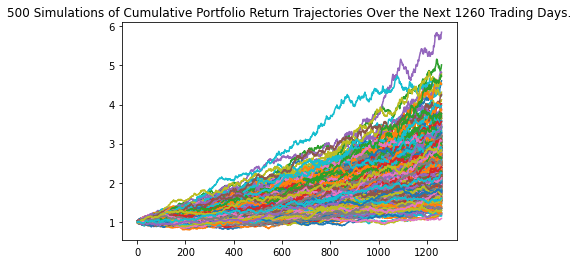

In [79]:
# Visualize the 5-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_mutual_funds.plot_simulation()

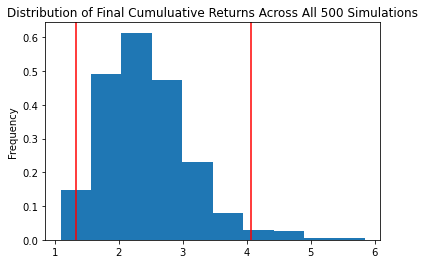

In [80]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_mutual_funds.plot_distribution()


In [81]:
# Generate summary statistics from the 5-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_mutual_funds.summarize_cumulative_return()

# Review the 5-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              2.431646
std               0.687530
min               1.089242
25%               1.954592
50%               2.341442
75%               2.831987
max               5.845715
95% CI Lower      1.333504
95% CI Upper      4.070054
Name: 1260, dtype: float64


In [82]:
# Print the current balance of the mutual funds of the members portfolio
print(f"The current balance of your investing in mutual funds is ${savings_amount:,.2f}")

The current balance of your investing in mutual funds is $4,000.00


In [83]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current mutual fund portfolio
ci_lower_cumulative_return = MC_summary_statistics[8]*savings_amount
ci_upper_cumulative_return = MC_summary_statistics[9]*savings_amount

# Print the result of your calculations
print(f"There is a 95% chance that the portfolio over the next 5 years will end within in the range of ${ci_lower_cumulative_return:,.2f} and ${ci_upper_cumulative_return:,.2f}.")

There is a 95% chance that the portfolio over the next 5 years will end within in the range of $5,334.01 and $16,280.22.


## Comparing investing in a "safe" bank account (i.e. high yield savings account, CD)
Compound Interest Formula FV = P (1 + r / n)^Yn, where P is the starting principal, r is the annual interest rate, Y is the number of years invested, and n is the number of compounding periods per year. FV is the future value, meaning the amount the principal grows to after Y years.

In [85]:
P = int(input("Enter starting principle please. "))
n = int(input("Enter number of compounding periods per year. "))
r = float(input("Enter annual interest rate. e.g. 15 for 15% "))
y = int(input("Enter the amount of years. "))

FV = P * (((1 + ((r/100.0)/n)) ** (n*y)))

print(f"The final amount after", y, f"years is ${FV:,.2f}.")

KeyboardInterrupt: Interrupted by user

In [ ]:
# another way to write code for compounding interest.  can tinker with it to make into function that takes in variables from questionaire?

years = range(1,31)
rate = 0.07
rates = pd.Series(index = years, data = rate)

x = 1000*((rates + 1).cumprod())
final_amount = x.tail(1).item()
print(f"${final_amount:,.2f}.")
